# 1. EDA (continued)

In [1]:
import pandas as pd
import numpy as np
from konlpy.tag import *
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from IPython.display import display
import matplotlib.font_manager as fm
from collections import Counter
import os

In [2]:
FONT_PATH = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=FONT_PATH, size=10).get_name()
fm.fontManager.addfont(FONT_PATH)

print(font_name)
plt.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용시 마이너스 폰트 깨짐 해결
plt.rcParams['font.family']=font_name
assert plt.rcParams['font.family'] == [font_name], "한글 폰트가 설정되지 않았습니다."

NanumGothic


# 1.EDA

In [3]:
label_kor2eng = {
    '행복' : 'happiness',
    '놀람' : 'surprise',
    '분노' : 'anger',
    '공포' : 'fear',
    '혐오' : 'disgust',
    '슬픔' : 'sadness',
    '중립' : 'neutralism'
}

LABELS = set(label_kor2eng.values())

COL_NAME = ['text', 'label']

In [4]:
df = pd.read_csv("cleaned_data.csv")

In [5]:
df.head()

,text,label
0,언니 동생으로 부르는게 맞는 일인가요..??,fear
1,그냥 내 느낌일뿐겠지?,fear
2,아직너무초기라서 그런거죠?,fear
3,유치원버스 사고 낫다던데,fear
4,근데 원래이런거맞나요,fear


In [6]:
df.shape

(38509, 2)

,text,label
0,언니 동생으로 부르는게 맞는 일인가요..??,fear
1,그냥 내 느낌일뿐겠지?,fear
2,아직너무초기라서 그런거죠?,fear
3,유치원버스 사고 낫다던데,fear
4,근데 원래이런거맞나요,fear
5,남자친구가 떠날까봐요,fear
6,이거 했는데 허리가 아플수도 있나요? ;;,fear
7,내가불안해서꾸는걸까..,fear
8,일주일도 안 남았당...ㅠㅠ,fear
9,약은 최대한 안먹으려고 하는데좋은 음시있나요?0,fear


happiness     6005
surprise      5886
anger         5664
fear          5449
disgust       5428
sadness       5250
neutralism    4827
Name: label, dtype: int64

----------------------------------------------------------------------------------------------------


happiness     0.155938
surprise      0.152847
anger         0.147083
fear          0.141499
disgust       0.140954
sadness       0.136332
neutralism    0.125347
Name: label, dtype: float64

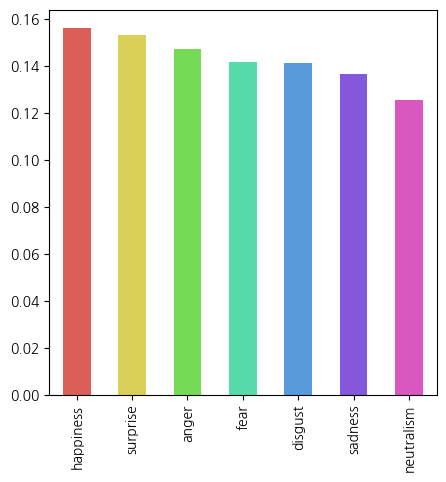

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38509 entries, 0 to 38508
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    38509 non-null  object
 1   label   38509 non-null  object
dtypes: object(2)
memory usage: 601.8+ KB


,text,label
count,38509,38509
unique,38509,7
top,언니 동생으로 부르는게 맞는 일인가요..??,happiness
freq,1,6005


In [7]:
# label distribution

display(df.head(10))
display(df['label'].value_counts())
print("-"*100)
norm_label = df['label'].value_counts(normalize=True)
display(norm_label)
norm_label.plot.bar(figsize=(5,5),color=sns.color_palette('hls',n_colors = len(norm_label)))
plt.show()
df.info()
display(df.describe(include='all'))

------------------------------------------------------------------------------------------------------------------------
최대 길이:  쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 쓰레기 13789
최소 길이:  아! 10147


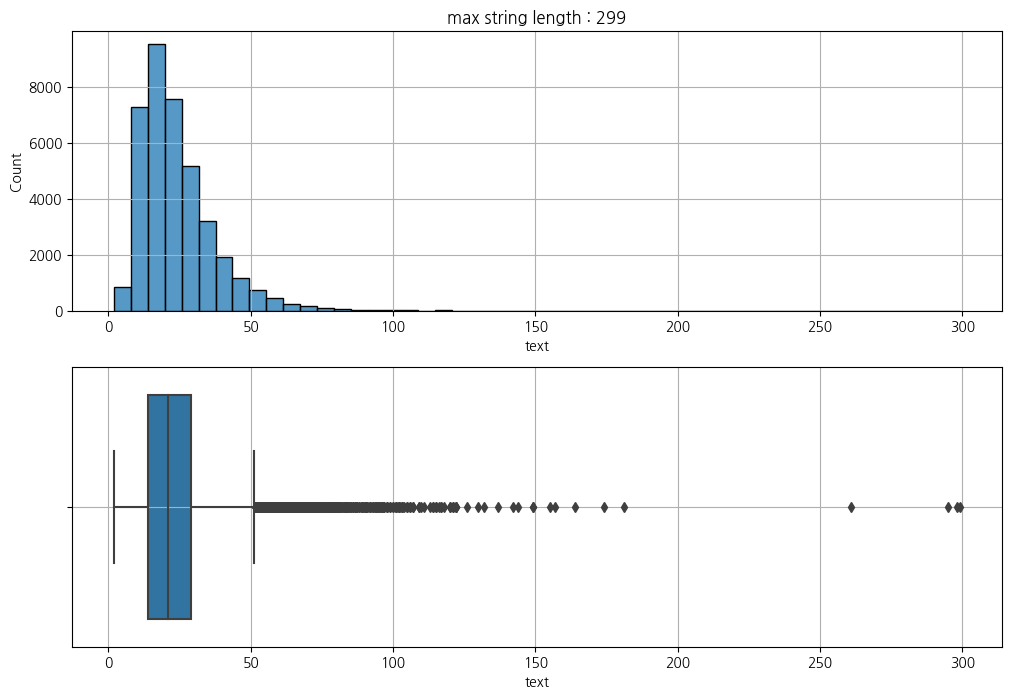

In [8]:
print("-"*120)
text_length = df.text.str.len()
print("최대 길이: ", df.text[text_length.argmax()], text_length.argmax())
print("최소 길이: ", df.text[text_length.argmin()], text_length.argmin())
plt.figure(figsize=(12, 8))
plt.subplot(2,1,1, title="max string length : " + str(max(text_length)))
sns.histplot(text_length, bins=50)
plt.grid()

plt.subplot(2,1,2)
sns.boxplot(x=text_length)
plt.grid()
plt.show()

In [9]:
mecab = Mecab()
mecab_tokenizer = lambda x : list("/".join(res) for res in mecab.pos(str(x)))

['나/NP', '느/NNG', 'ㄴ/NNG', '왕/NNG', '이/VCP', '다/EC']